# Iris metrics

In [22]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append('../') 

# Datasets
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
# Multi-layer Perceptron
from nn.swarm_perceptron_qpso import perceptron 

In [23]:
data_name = 'iris'
training_type = ['individial_layers', 'exchange_layers','training_exchange_layers', 'training_exchange_layers_e', 'no_individial_layers', 'no_exchange_layers', 'one_individial_layers']
algorithm = 'qdpso'
data = load_iris()
X_org = data.data
y_org = data.target
print('Shape of X: ', X_org.shape)
print('Shape of y: ', y_org.shape)
# normalize data (0,1)
t = MinMaxScaler()
t.fit(X_org)
X_org = t.transform(X_org)
# Split Dataset 80% for training and 20% for testing
X_train_aux, X_test_bal, y_train_aux, y_test_bal = train_test_split(X_org, y_org, test_size=0.2, random_state=100)
# Split Taining Dataset (80%) in training (87.5% of 80% => 70% of total) and validation(12.5% of 80% => 10% of total)
X_train_bal, X_val_bal, y_train_bal, y_val_bal = train_test_split(X_train_aux, y_train_aux, test_size=0.125, random_state=100)  
print(f"Training target statistics: {Counter(y_train_bal)}")
print(f"Testing target statistics: {Counter(y_test_bal)}")
print(f"Validation target statistics: {Counter(y_val_bal)}")
# Global variables
X_sample = len(X_train_bal)
X_input = len(X_train_bal[1])
X_class = len(np.unique(y_train_bal))
n_particulas = 100
max_iter = 20
n_training = 15
X_train = X_train_bal
y_train = y_train_bal
X_test = X_test_bal
y_test = y_test_bal
X_val = X_val_bal
y_val = y_val_bal
#---------------------------------------
# variable initialize for qpso algorithm
#---------------------------------------
beta = 1.13 #1.13
gBest_value = []
gBest = []
cost_test = []
cost_val = []
metric_train_hidden = []
metric_train_output = []

# load perceptron
nn = perceptron(X_sample, X_input, X_class)

Shape of X:  (150, 4)
Shape of y:  (150,)
Training target statistics: Counter({1: 38, 0: 36, 2: 31})
Testing target statistics: Counter({2: 13, 0: 11, 1: 6})
Validation target statistics: Counter({1: 6, 2: 6, 0: 3})


# Testing and Validation Value

In [29]:
def calculate_and_store_cost(train_type, data_name, algorithm, n_particulas, max_iter, X_input, X_test, y_test, X_val, y_val, nn, execution_time):
    # Cargar parámetros
    parameters = np.load(f"../output/{train_type}/{data_name}/{algorithm}_{data_name}_gBest_113_{n_particulas}_{max_iter}_{X_input}.npy")
    # Predicción y costo para el conjunto de prueba
    y_test_pred = np.argmax(nn.forward(X_test, parameters), axis=1)
    cost_test = mean_squared_error(y_test, y_test_pred)
    # Predicción y costo para el conjunto de validación
    y_val_pred = np.argmax(nn.forward(X_val, parameters), axis=1)
    cost_val = mean_squared_error(y_val, y_val_pred)    
    return {
        'Training Type': train_type,
        'Test Cost': cost_test,
        'Validation Cost': cost_val,
        'Execution Time': execution_time 
    }

# Cargar los tiempos de ejecución
execution_times = [
    np.load(f"../output/{train_type}/{data_name}/{data_name}_start_end_execution_time.npy")[2] 
    for train_type in training_type
]
# Crear una lista vacía para almacenar los resultados
results = []
# Llamar a la función para cada tipo de entrenamiento y almacenar los resultados
for i, train_type in enumerate(training_type):
    execution_time = execution_times[i] 
    result = calculate_and_store_cost(train_type, data_name, algorithm, n_particulas, max_iter, X_input, X_test, y_test, X_val, y_val, nn, execution_time)
    results.append(result)

# Convertir la lista de resultados en un DataFrame
df_results = pd.DataFrame(results)
# Invertir el orden de las filas
df_results_reversed = df_results.iloc[::-1].reset_index(drop=True)
# Mostrar el DataFrame
print(df_results_reversed)


                Training Type  Test Cost  Validation Cost  Execution Time
0       one_individial_layers   0.000000         0.000000        9.699697
1          no_exchange_layers   0.000000         0.000000       12.118768
2        no_individial_layers   1.000000         0.666667       11.744021
3  training_exchange_layers_e   0.000000         0.000000       14.905879
4    training_exchange_layers   0.000000         0.000000       15.272946
5             exchange_layers   0.000000         0.000000       20.208263
6           individial_layers   0.566667         0.600000       20.368196


# Metrcis

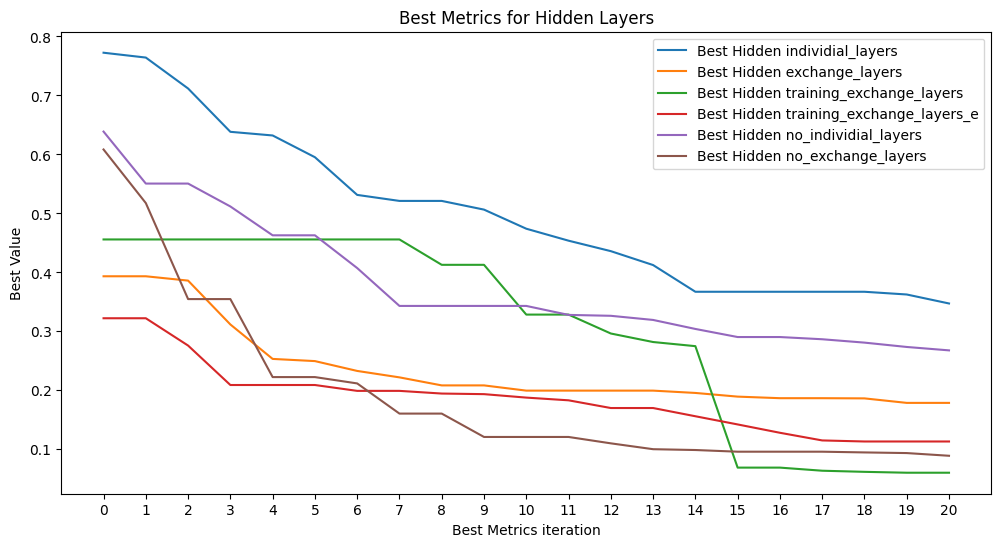

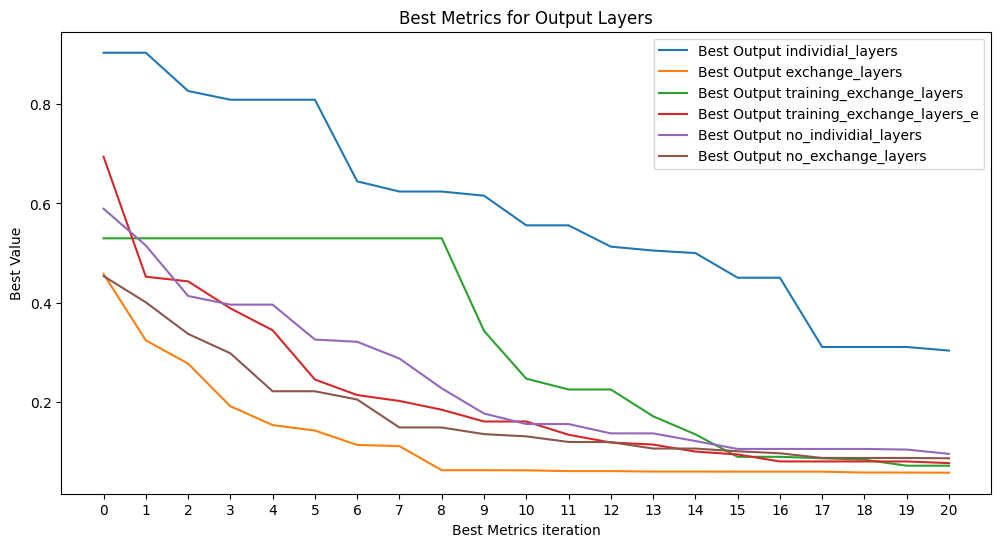

In [33]:
def plot_layer_metrics(layer_index, layer_name):
    plt.figure(figsize=(12, 6))
    plt.title(f'Best Metrics for {layer_name} Layers')
    plt.xlabel('Best Metrics iteration')
    plt.ylabel('Best Value')
    
    for train_type in training_type[:-1]:
        file_path = f"../output/{train_type}/{data_name}/{algorithm}_{data_name}_gBestIter_113_{n_particulas}_{max_iter}_{X_input}.npy"
        best_curve = np.load(file_path)
        
        plt.plot(best_curve[layer_index], label=f'Best {layer_name} {train_type}')
        
    plt.xticks(np.arange(0, len(best_curve[layer_index]), 1))
    plt.legend()
    plt.show()

# Graficar las capas ocultas
plot_layer_metrics(0, 'Hidden')

# Graficar las capas de salida
plot_layer_metrics(1, 'Output')

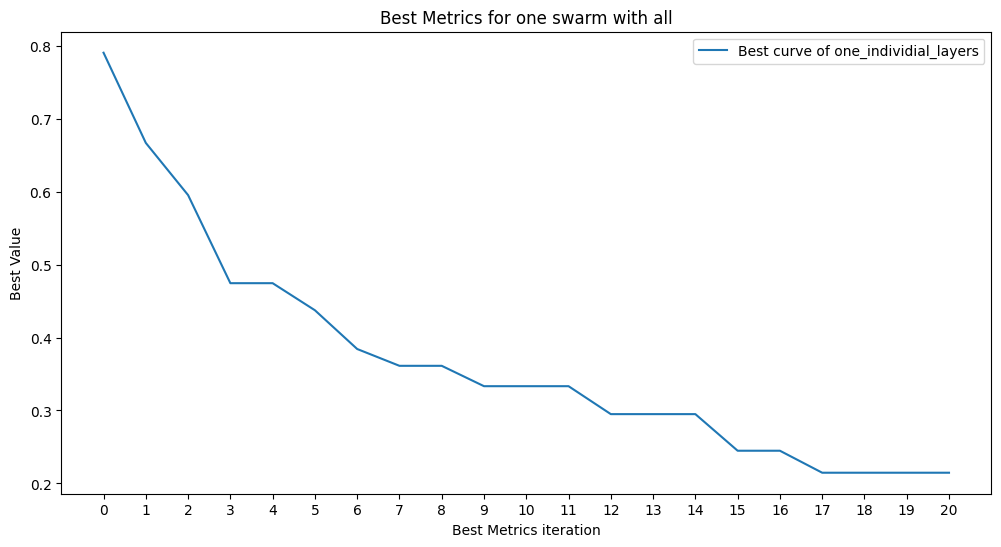

In [34]:
plt.figure(figsize=(12, 6))
plt.title(f'Best Metrics for one swarm with all')
plt.xlabel('Best Metrics iteration')
plt.ylabel('Best Value')
    
for train_type in training_type[-1:]:
    file_path = f"../output/{train_type}/{data_name}/{algorithm}_{data_name}_gBestIter_113_{n_particulas}_{max_iter}_{X_input}.npy"
    best_curve = np.load(file_path)        
    plt.plot(best_curve, label=f'Best curve of {train_type}')
        
plt.xticks(np.arange(0, len(best_curve), 1))
plt.legend()
plt.show()